https://www.kaggle.com/code/khotijahs1/breast-cancer-wisconsin-prediction-supervised

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# load dataset
folder = '/content/drive/My Drive/Colab Notebooks/HIA303 Health Data Analytics/'

In [26]:
import pandas as pd
data= pd.read_csv('/content/drive/My Drive/Colab Notebooks/HIA303 Health Data Analytics/breast-cancer-wisconsin-imputed.csv')
data

,sample_id,cl_thcknss,size_cell_un,shape_cell_un,marg_adhesion,size_cell_single,bare_nucl,bl_chrmatn,nrml_nucleo,mitoses,class
0,1000025,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2
1,1002945,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2
2,1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2
3,1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2
4,1017023,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2
695,841769,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2
696,888820,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4
697,897471,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4


In [28]:
# drop the value of the column id as machine learning screening on id will not provide us insight
data = data.drop(columns=['sample_id'])


In [5]:
data.shape

(699, 10)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [6]:
# How many benign and malignant data?
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [7]:
data.head()

,cl_thcknss,size_cell_un,shape_cell_un,marg_adhesion,size_cell_single,bare_nucl,bl_chrmatn,nrml_nucleo,mitoses,class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2


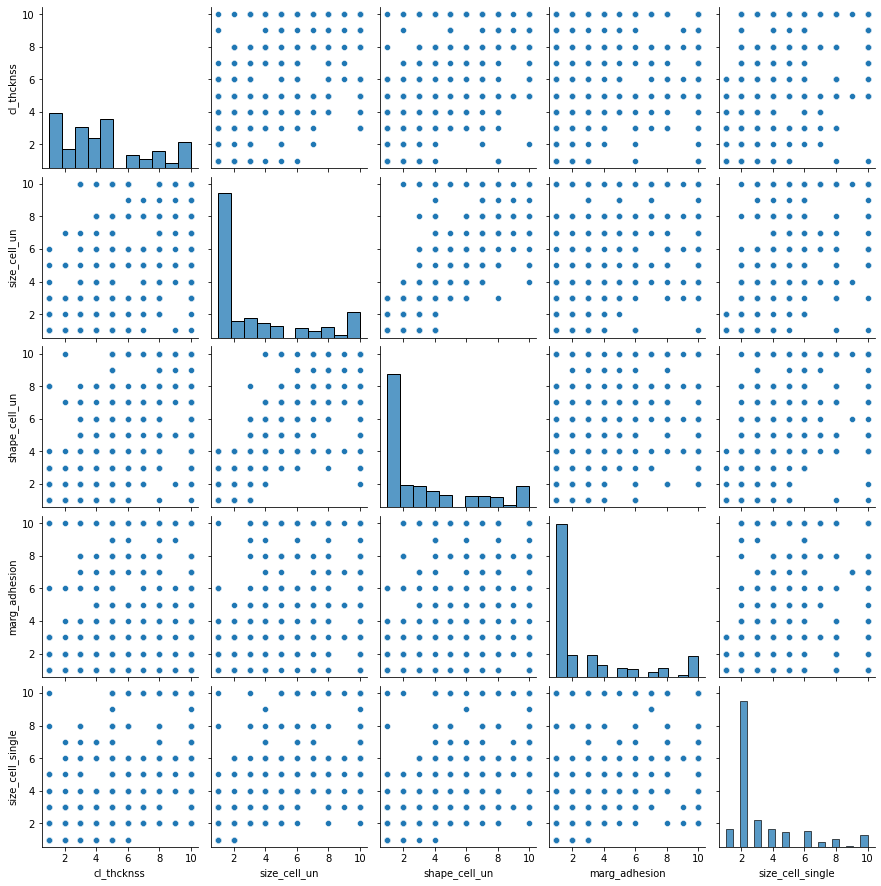

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's plot out just the first 5 variables (features)
sns.pairplot(data, vars = ['cl_thcknss', 'size_cell_un', 'shape_cell_un', 'marg_adhesion',
       'size_cell_single'] )

In [9]:
data.tail()

,cl_thcknss,size_cell_un,shape_cell_un,marg_adhesion,size_cell_single,bare_nucl,bl_chrmatn,nrml_nucleo,mitoses,class
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4
698,4.0,8.0,8.0,5.0,4.0,5.0,10.0,4.0,1.0,4


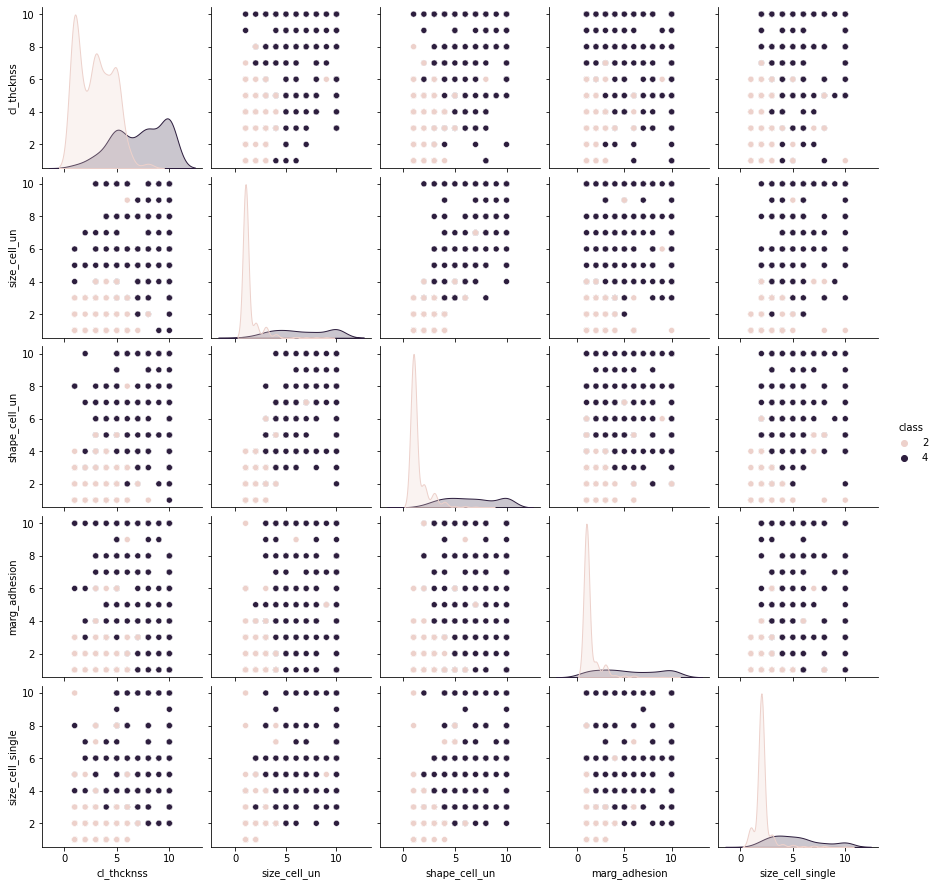

In [ ]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(data, hue = 'class', vars = ['cl_thcknss', 'size_cell_un', 'shape_cell_un', 'marg_adhesion',
       'size_cell_single'] )

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


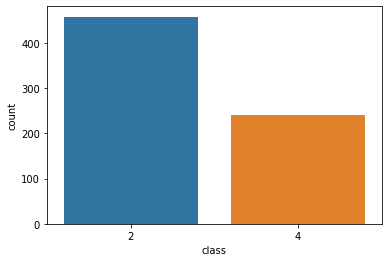

In [ ]:
sns.countplot(data['class'], label = "Count") 

Let's check the correlation between our features

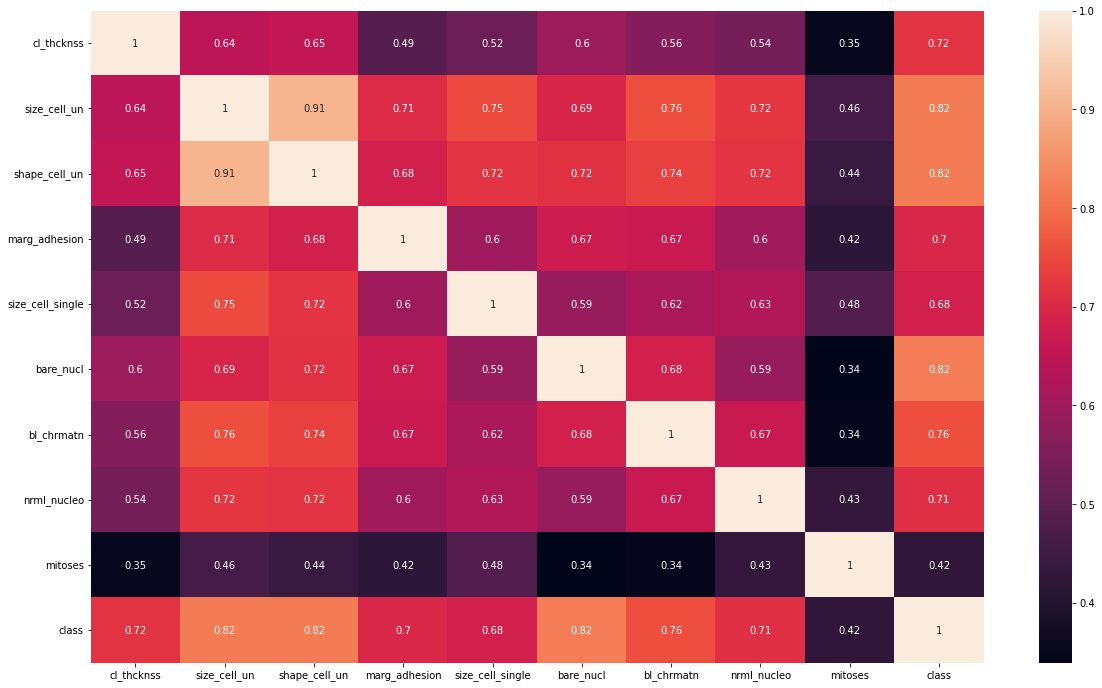

In [ ]:
# before scaling
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.figure(figsize=(20,12)) 
sns.heatmap(data.corr(), annot=True) 

In [29]:
# "y" = Is the feature we are trying to predict (Output). In this case, we are trying to predict wheither our "target" is Cancer (Malignant) or not (Benign).
# we are going to use the "Class" feature here.
# "X" = The predictors which are the remaining columns (clump thickness, cell size uniformity, cell shape iniformity, Marginal Adhesion, Chromatin, etc)
# Define x
X = data.drop(['class'], axis = 1) # We drop our "Class" feature and use all the remaining features in our dataframe to train the model.
X.head()

,cl_thcknss,size_cell_un,shape_cell_un,marg_adhesion,size_cell_single,bare_nucl,bl_chrmatn,nrml_nucleo,mitoses
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0


In [30]:
y = data['class']
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

SVM METHOD & CONFUSION MATRIX

In [31]:
# Scale the features - Min and Max scaling (sensitive to outliers)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneOut
from sklearn import svm # for Support Vector Machine
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
# Cross-Validation for small datasets to prevent biased and overfitting of model
loo = LeaveOneOut()

# Run supervised learning - Support Vector Machine algorithm
model = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
        max_iter=-1, probability=True, random_state=None, shrinking=False,
        tol=0.001, verbose=False)

In [33]:
# LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction,probability and mean accuracy from all observations
predictions = []
probabilities = []
scores = []

In [34]:
import numpy as np
# Loop through the cross-validation splits/observations
for train_index, test_index in loo.split(X_scaled):
    # While splitting data into training and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model using the training sets
    model.fit(X_train,y_train)
        
   # Get prediction
    predicted_y = model.predict(X_test)
    
    # Get probability
    probability_y = model.predict_proba(X_test)[:,1]
    
    # Append each predicted label and probability score into list
    predictions.append(predicted_y[0])
    probabilities.append(probability_y[0])
    scores.append(accuracy_score(y_test, predicted_y))
    
# Convert the lists to a Numpy Array
predictions = np.array(predictions)
probabilities = np.array(probabilities)

In [42]:
# Calculate confusion matrix
svmcla_cm = confusion_matrix(y,predictions)

# Calculate the mean accuracy
score_svmcla = sum(scores) / len(scores)
print("Accuracy:", score_svmcla)

Accuracy: 0.9570815450643777


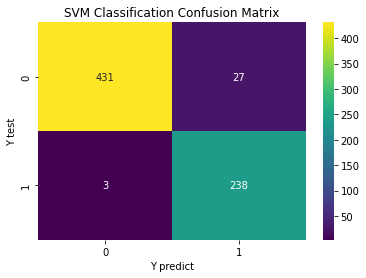

In [43]:
# Plot confusion matrix using Seaborn Heatmap
import seaborn as sns
sns.heatmap(svmcla_cm,annot=True,fmt='d',cmap='viridis')
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [44]:
#Next step is to check the accuracy of our prediction by comparing it to the output we already have (y_test). 
#We are going to use confusion matrix for this comparison
#True Positive: A positive class observation (1) is correctly classified as positive by the model.

#False Positive: A negative class observation (0) is incorrectly classified as positive.

#True Negative: A negative class observation is correctly classified as negative.

#False Negative: A positive class observation is incorrectly classified as negative.

# Comprehensive Classification Report
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           2       0.99      0.94      0.97       458
           4       0.90      0.99      0.94       241

    accuracy                           0.96       699
   macro avg       0.95      0.96      0.95       699
weighted avg       0.96      0.96      0.96       699



Random Forest Classifier algorithm

In [68]:
# Cross-Validation for small datasets to prevent biased and overfitting of model
loo = LeaveOneOut()

In [69]:
from sklearn.ensemble import RandomForestClassifier
# Run supervised learning - Random Forest Classifier algorithm
model=RandomForestClassifier()

In [70]:
# LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction,probability and mean accuracy from all observations
predictions = []
probabilities = []
scores = []

In [71]:
# Loop through the cross-validation splits/observations
for train_index, test_index in loo.split(X_scaled):
    # While splitting data into training and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model using the training sets
    model.fit(X_train,y_train)
   
    # Get prediction
    predicted_y = model.predict(X_test)
    
    # Get probability
    probability_y = model.predict_proba(X_test)[:,1]
    
    # Append each predicted label and probability score into list
    predictions.append(predicted_y[0])
    probabilities.append(probability_y[0])
    scores.append(accuracy_score(y_test, predicted_y))

# Convert the lists to a Numpy Array
predictions = np.array(predictions)
probabilities = np.array(probabilities)

In [72]:
# Calculate confusion matrix
rfcla_cm = confusion_matrix(y,predictions)

# Calculate the mean accuracy
score_rfcla = sum(scores) / len(scores)
print("Accuracy:", score_rfcla)

Accuracy: 0.9670958512160229


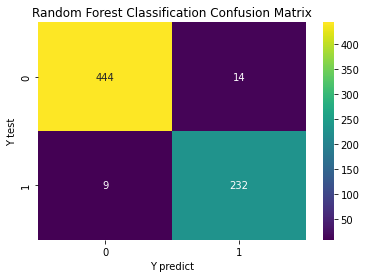

In [73]:
# Plot confusion matrix using Seaborn Heatmap
sns.heatmap(rfcla_cm,annot=True,fmt='d',cmap='viridis')
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [74]:
# Comprehensive Classification Report
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           2       0.98      0.97      0.97       458
           4       0.94      0.96      0.95       241

    accuracy                           0.97       699
   macro avg       0.96      0.97      0.96       699
weighted avg       0.97      0.97      0.97       699



Logistic regression classification

In [79]:
# Cross-Validation for small datasets to prevent biased and overfitting of model
from sklearn.linear_model import LogisticRegression
loo = LeaveOneOut()

# Run supervised learning - Logistic Regression algorithm
model = LogisticRegression()


In [80]:
# LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction,probability and mean accuracy from all observations
predictions = []
probabilities = []
scores = []

In [81]:
# Loop through the cross-validation splits/observations
for train_index, test_index in loo.split(X_scaled):
    # While splitting data into training and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train classifier
    model.fit(X_train,y_train)
    
    # Get prediction
    predicted_y = model.predict(X_test)
    
    # Get probability
    probability_y = model.predict_proba(X_test)[:,1]

    # Append each predicted label and probability score into list
    predictions.append(predicted_y[0])
    probabilities.append(probability_y[0])
    scores.append(accuracy_score(y_test, predicted_y))

# Convert the lists to a Numpy Array
predictions = np.array(predictions)
probabilities = np.array(probabilities)

In [82]:
# Calculate confusion matrix
logreg_cm = confusion_matrix(y,predictions)

# Calculate the mean accuracy
score_logreg = sum(scores) / len(scores)
print("Accuracy:", score_logreg)

Accuracy: 0.9642346208869814


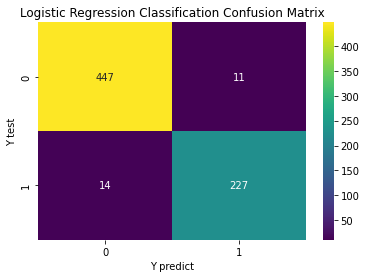

In [83]:
# Plot confusion matrix using Seaborn Heatmap
sns.heatmap(logreg_cm,annot=True,fmt='d',cmap='viridis')
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()


In [84]:
# Comprehensive Classification Report
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           2       0.97      0.98      0.97       458
           4       0.95      0.94      0.95       241

    accuracy                           0.96       699
   macro avg       0.96      0.96      0.96       699
weighted avg       0.96      0.96      0.96       699



Naive bayes classification

In [85]:
# Naive bayes classification
from sklearn.naive_bayes import GaussianNB

loo = LeaveOneOut()

# Run supervised learning - Logistic Regression algorithm
model = GaussianNB()

In [86]:
# LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction,probability and mean accuracy from all observations
predictions = []
probabilities = []
scores = []

In [87]:
# Loop through the cross-validation splits/observations
for train_index, test_index in loo.split(X_scaled):
    # While splitting data into training and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model using the training sets
    model.fit(X_train,y_train)
        
   # Get prediction
    predicted_y = model.predict(X_test)
    
    # Get probability
    probability_y = model.predict_proba(X_test)[:,1]
    
    # Append each predicted label and probability score into list
    predictions.append(predicted_y[0])
    probabilities.append(probability_y[0])
    scores.append(accuracy_score(y_test, predicted_y))

# Convert the lists to a Numpy Array
predictions = np.array(predictions)
probabilities = np.array(probabilities)

In [88]:
# Calculate confusion matrix
nbcla_cm = confusion_matrix(y,predictions)

# Calculate the mean accuracy
score_nbcla = sum(scores) / len(scores)
print("Accuracy:", score_nbcla)

Accuracy: 0.9585121602288984


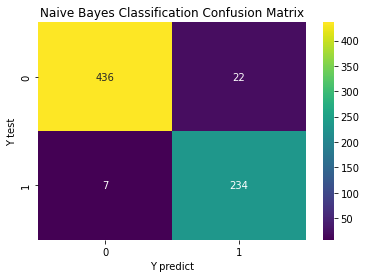

In [89]:
# Plot confusion matrix using Seaborn Heatmap
sns.heatmap(nbcla_cm,annot=True,fmt='d',cmap='viridis')
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [90]:
# Comprehensive Classification Report
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           2       0.98      0.95      0.97       458
           4       0.91      0.97      0.94       241

    accuracy                           0.96       699
   macro avg       0.95      0.96      0.95       699
weighted avg       0.96      0.96      0.96       699



Decision tree classification

In [93]:
from sklearn.tree import DecisionTreeClassifier
# Cross-Validation for small datasets to prevent biased and overfitting of model
loo = LeaveOneOut()

# Run supervised learning - Decision Tree Classifier algorithm
model=DecisionTreeClassifier()

In [94]:
# LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction,probability and mean accuracy from all observations
predictions = []
probabilities = []
scores = []

In [96]:

# Loop through the cross-validation splits/observations
for train_index, test_index in loo.split(X_scaled):
    # While splitting data into training and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model using the training sets
    model.fit(X_train,y_train)
   
    # Get prediction
    predicted_y = model.predict(X_test)
    
    # Get probability
    probability_y = model.predict_proba(X_test)[:,1]
    
    # Append each predicted label and probability score into list
    predictions.append(predicted_y[0])
    probabilities.append(probability_y[0])
    scores.append(accuracy_score(y_test, predicted_y))

# Convert the lists to a Numpy Array
predictions = np.array(predictions)
probabilities = np.array(probabilities)

In [97]:
# Calculate confusion matrix
dtcla_cm = confusion_matrix(y,predictions)

# Calculate the mean accuracy
score_dtcla= sum(scores) / len(scores)
print("Accuracy:", score_dtcla)

Accuracy: 0.9427753934191703


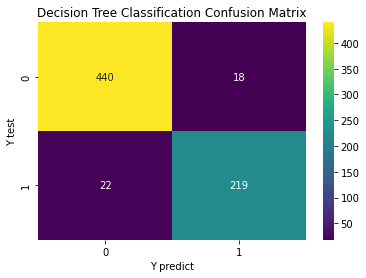

In [98]:
# Plot confusion matrix using Seaborn Heatmap
sns.heatmap(dtcla_cm,annot=True,fmt='d',cmap='viridis')
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [105]:
# K-Nearest Neighbor classification
from sklearn.neighbors import KNeighborsClassifier

# Cross-Validation for small datasets to prevent biased and overfitting of model
loo = LeaveOneOut()
# since the optimum k = 3
# Run supervised learning - K-Nearest Neighbour algorithm
k=3
model = KNeighborsClassifier(n_neighbors=k)

In [106]:
# LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction,probability and mean accuracy from all observations
predictions = []
probabilities = []
scores = []

In [107]:
# Loop through the cross-validation splits/observations
for train_index, test_index in loo.split(X_scaled):
    # While splitting data into training and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model using the training sets
    model.fit(X_train,y_train)
   
    # Get prediction
    predicted_y = model.predict(X_test)
    
    # Get probability
    probability_y = model.predict_proba(X_test)[:,1]
    
    # Append each predicted label and probability score into list
    predictions.append(predicted_y[0])
    probabilities.append(probability_y[0])
    scores.append(accuracy_score(y_test, predicted_y))

# Convert the lists to a Numpy Array
predictions = np.array(predictions)
probabilities = np.array(probabilities)

In [108]:
# Calculate confusion matrix
knncla_cm = confusion_matrix(y,predictions)

# Calculate the mean accuracy
score_knncla = sum(scores) / len(scores)
print("Accuracy:", score_knncla)

Accuracy: 0.9642346208869814


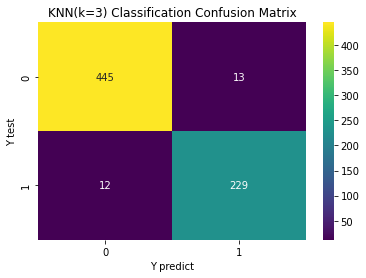

In [109]:
# Plot confusion matrix using Seaborn Heatmap
sns.heatmap(knncla_cm,annot=True,fmt='d',cmap='viridis')
plt.title('KNN(k=3) Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [110]:
# Comprehensive Classification Report
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           2       0.97      0.97      0.97       458
           4       0.95      0.95      0.95       241

    accuracy                           0.96       699
   macro avg       0.96      0.96      0.96       699
weighted avg       0.96      0.96      0.96       699



In [111]:
# Comparison of classification techniques
Testscores = pd.Series([score_logreg, score_svmcla, score_nbcla, score_dtcla, score_rfcla, score_knncla], 
                        index=['Logistic Regression Score', 'Support Vector Machine Score', 'Naive Bayes Score', 'Decision Tree Score', 'Random Forest Score', 'K-Nearest Neighbour Score']) 
print(Testscores)

Logistic Regression Score       0.964235
Support Vector Machine Score    0.957082
Naive Bayes Score               0.958512
Decision Tree Score             0.942775
Random Forest Score             0.967096
K-Nearest Neighbour Score       0.964235
dtype: float64


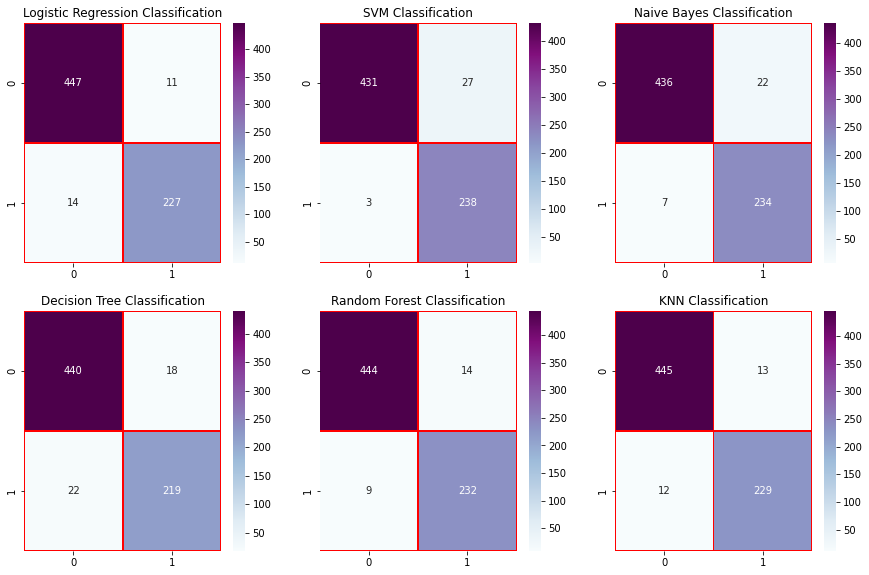

In [112]:
# The confusion matrix
# Confusion matrix is a specific table layout that allows visualization of the performance of an algorithm for supervised learning.
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Naive Bayes Classification')
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Decision Tree Classification')
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Random Forest Classification')
ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('KNN Classification')
sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax1)
sns.heatmap(data=svmcla_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax2)  
sns.heatmap(data=nbcla_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax3)
sns.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax4)
sns.heatmap(data=rfcla_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax5)
sns.heatmap(data=knncla_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax6)
plt.show()